In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/satelite/data/labels/38_68.png
/kaggle/input/satelite/data/labels/121_142.png
/kaggle/input/satelite/data/labels/173.png
/kaggle/input/satelite/data/labels/248.png
/kaggle/input/satelite/data/labels/94.png
/kaggle/input/satelite/data/labels/40_277.png
/kaggle/input/satelite/data/labels/18_42.png
/kaggle/input/satelite/data/labels/236.png
/kaggle/input/satelite/data/labels/85_117.png
/kaggle/input/satelite/data/labels/48.png
/kaggle/input/satelite/data/labels/23_251.png
/kaggle/input/satelite/data/labels/227.png
/kaggle/input/satelite/data/labels/97_130.png
/kaggle/input/satelite/data/labels/238.png
/kaggle/input/satelite/data/labels/61.png
/kaggle/input/satelite/data/labels/222.png
/kaggle/input/satelite/data/labels/108_236.png
/kaggle/input/satelite/data/labels/278.png
/kaggle/input/satelite/data/labels/62_187.png
/kaggle/input/satelite/data/labels/303.png
/kaggle/input/satelite/data/labels/37.png
/kaggle/input/satelite/data/labels/231.png
/kaggle/input/satelite/data/lab

# Load DataSet

In [6]:
import os
import numpy as np
from tifffile import imread
from PIL import Image

images_dir = "/kaggle/input/satelite/data/images" # Directory of images
labels_dir = "/kaggle/input/satelite/data/labels" # Directory of labels

# List files
image_files = sorted([f for f in os.listdir(images_dir)]) # Sort images

# Remove any labels that have "_" in the name
label_files = sorted([f for f in os.listdir(labels_dir) if "_" not in f]) # Sort labels and clean labels with "_"

# Keep only labels that match an image filename
label_files = [f for f in label_files if f.replace(".png", ".tif") in image_files]

# Read them
images = []
labels = []

for lbl_file in label_files:
    img_file = lbl_file.replace(".png", ".tif")

    # Read image
    img_path = os.path.join(images_dir, img_file)
    img = imread(img_path)  # shape could be (H, W, C)
    images.append(img.astype(np.float32))

    # Read label
    lbl_path = os.path.join(labels_dir, lbl_file)
    lbl = np.array(Image.open(lbl_path))  # shape (H, W)
    labels.append(lbl)

# Convert to numpy arrays
images = np.stack(images)
labels = np.stack(labels)

print("Images shape:", images.shape)  
print("Labels shape:", labels.shape)
print("Unique values in labels:", np.unique(labels))


Images shape: (306, 128, 128, 12)
Labels shape: (306, 128, 128)
Unique values in labels: [0 1]


# Exract RGB Images

In [7]:
images_bgr = images[:, :, :, 1:4] # Get images BGR at channels 1,2,3
images_rgb = images_bgr[:, :, :, [2, 1, 0]] # Resort BGR to RGB
images_rgb = np.array([(im - im.min()) / (im.max() - im.min()) for im in images_rgb]) # Normalize using min-max normalization
print("Images shape:", images_rgb.shape)

Images shape: (306, 128, 128, 3)


# Plot some RGB Images

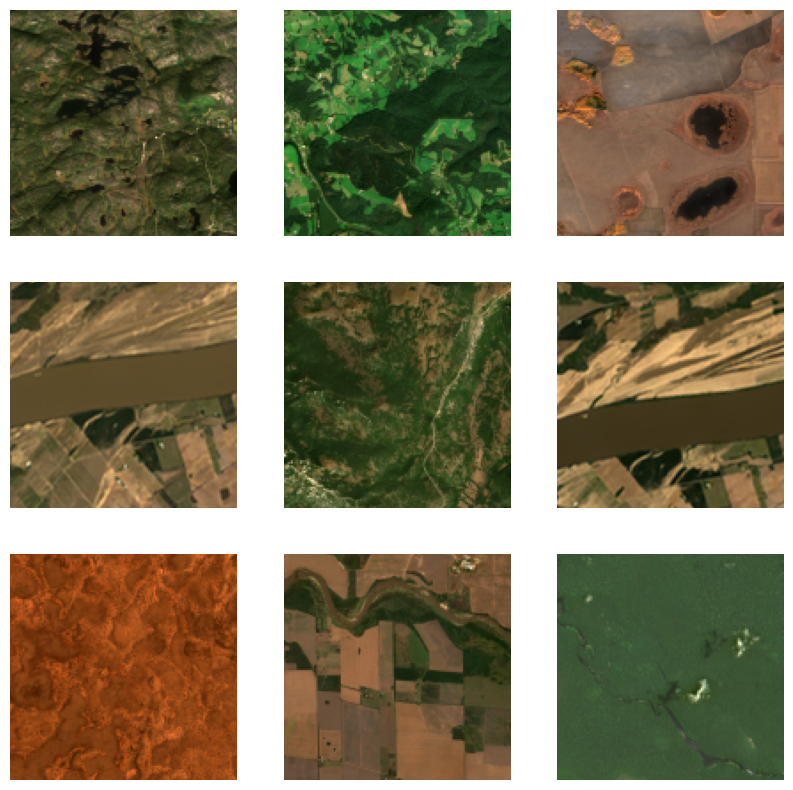

In [8]:
import matplotlib.pyplot as plt

n = 9
plt.figure(figsize=(10,10))

for i in range(n):
    plt.subplot(3,3,i+1)   # 3x3 grid
    img = images_rgb[i]
    plt.imshow(img)
    plt.axis('off')
plt.show()

# Plot label vs all channels to display relevance

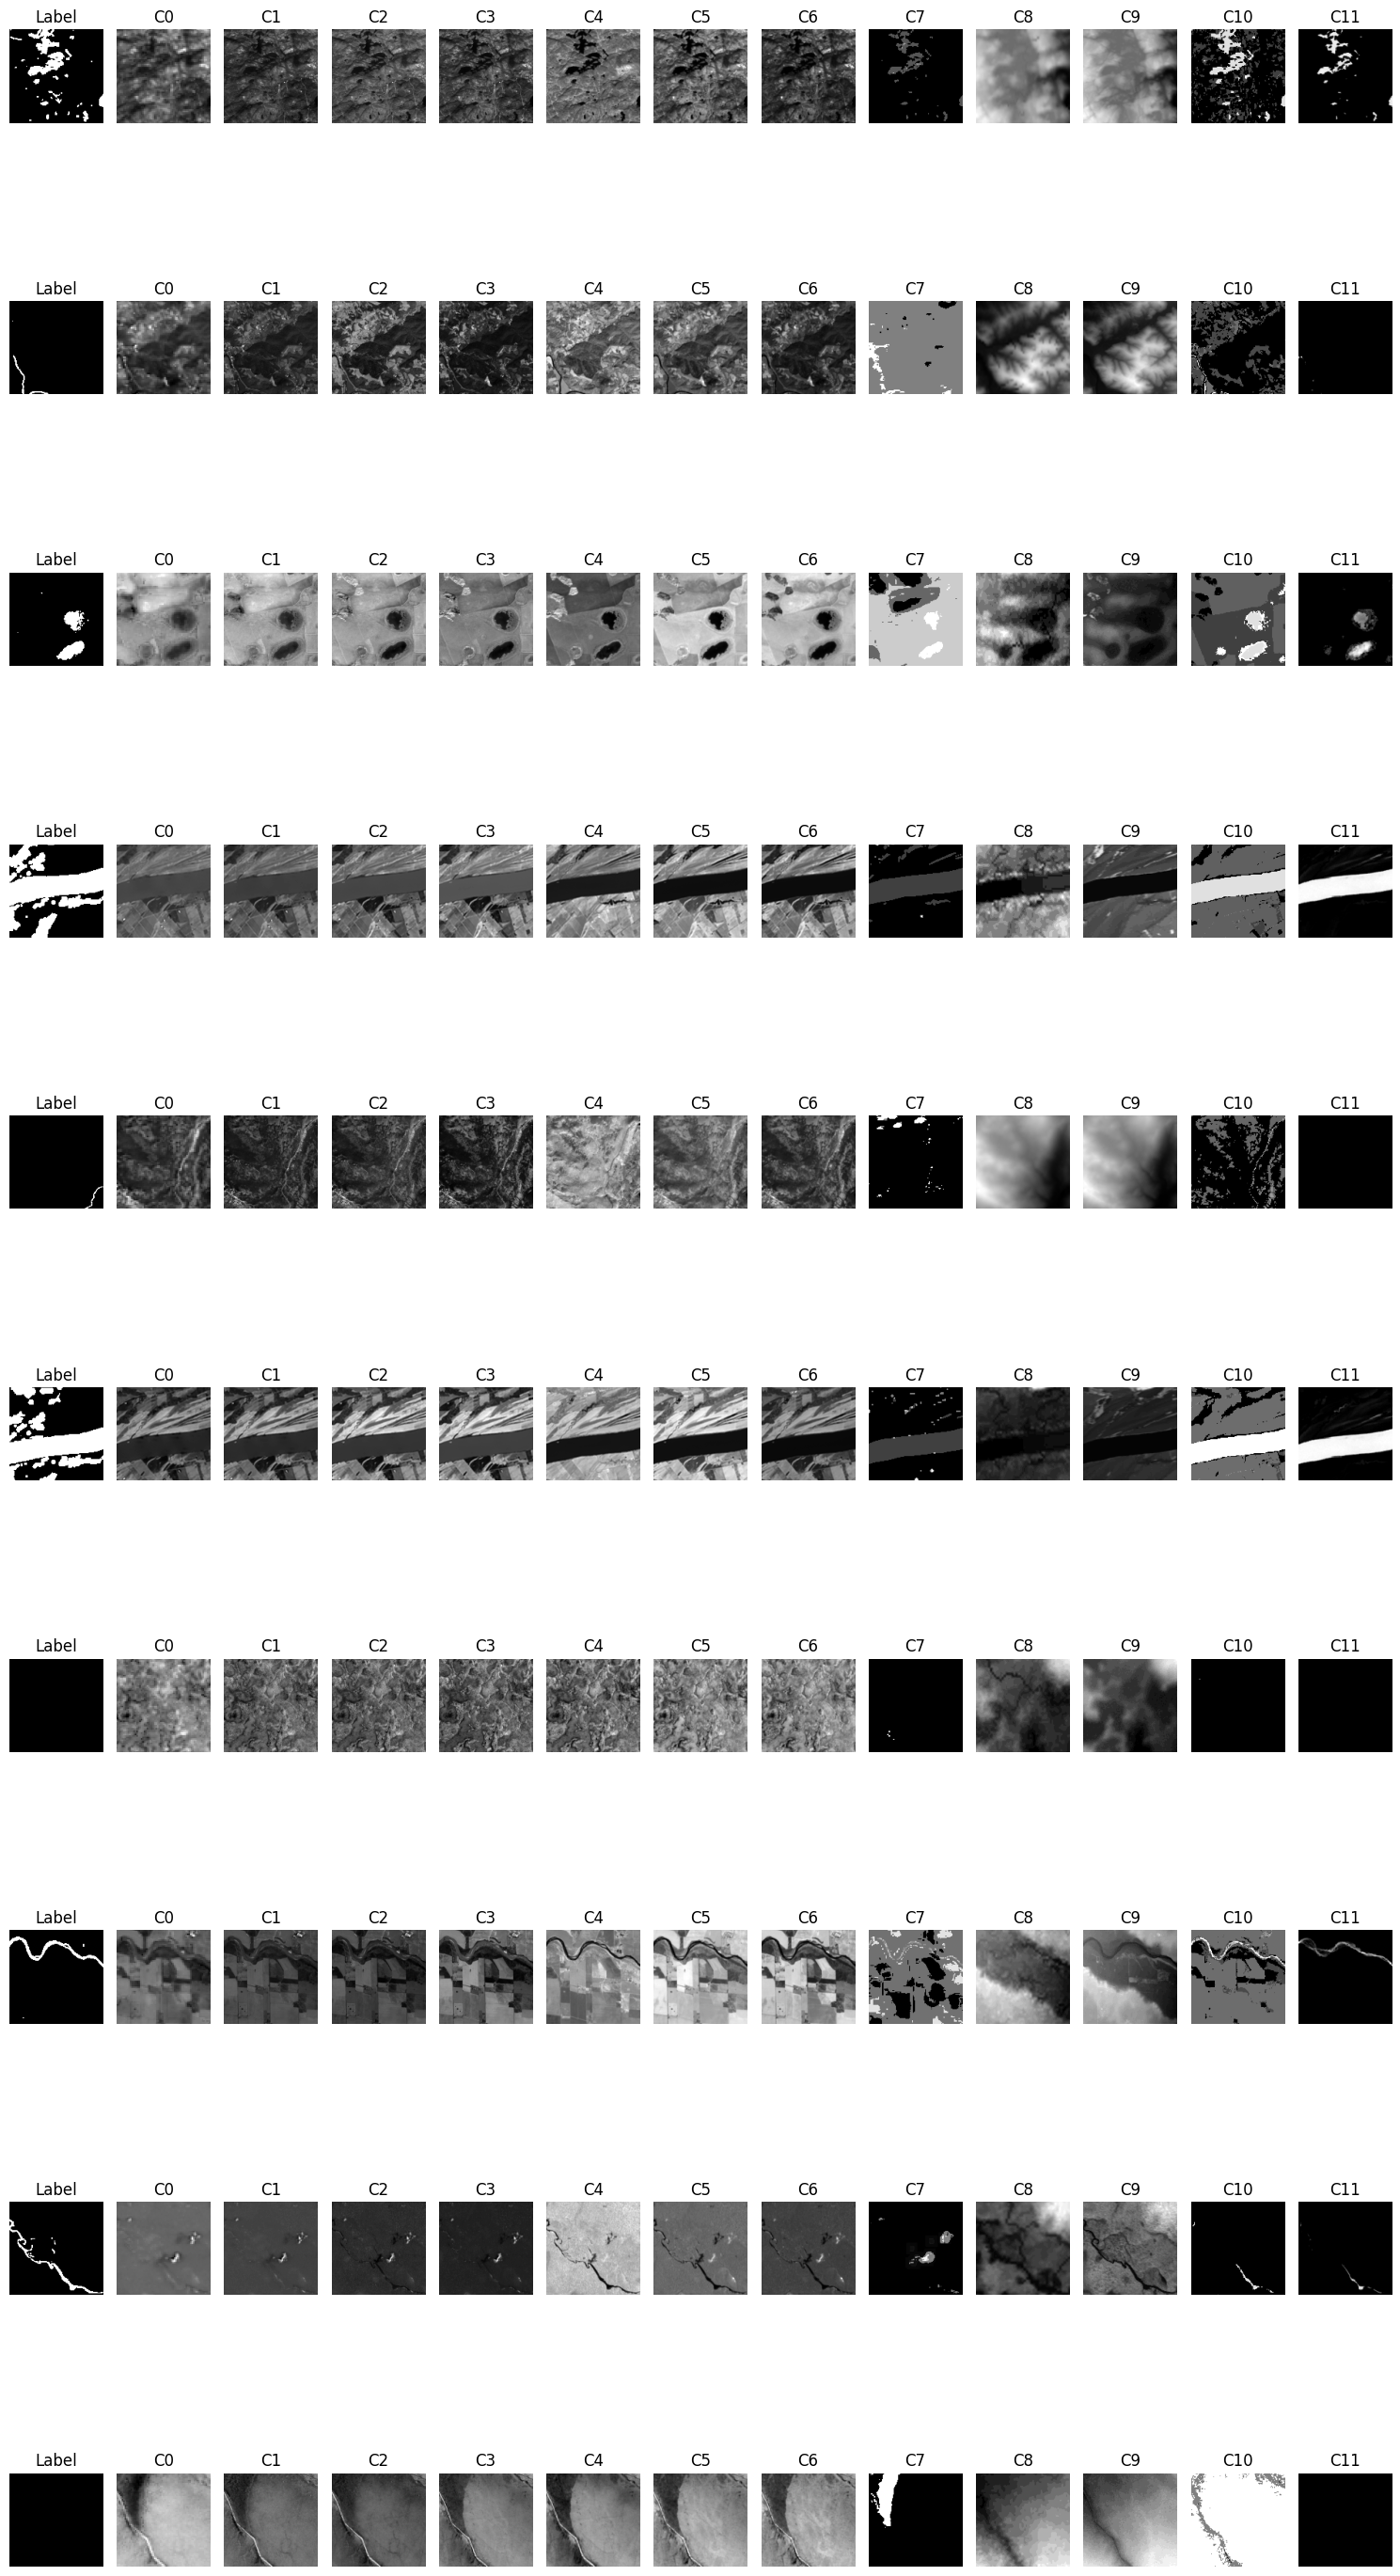

In [9]:
import matplotlib.pyplot as plt

num_samples = 10      # how many samples you want to show
num_channels = 12    # number of channels per image

plt.figure(figsize=(15, 3 * num_samples))

for i in range(num_samples):
    # Label first
    plt.subplot(num_samples, num_channels + 1, i*(num_channels+1) + 1)
    plt.imshow(labels[i], cmap="gray")
    plt.axis("off")
    plt.title("Label")

    # Then each channel
    for j in range(num_channels):
        plt.subplot(num_samples, num_channels + 1, i*(num_channels+1) + j + 2)
        plt.imshow(images[i][..., j], cmap="gray")
        plt.axis("off")
        plt.title(f"C{j}")

plt.tight_layout()
plt.show()

# Check Variation in all channels 

In [10]:
import numpy as np

# Suppose images is (N, H, W, C)
N, H, W, C = images.shape

channel_means = []
channel_stds  = []
channel_mins  = []
channel_maxs  = []

for c in range(C):
    vals = images[..., c].ravel()
    channel_means.append(np.mean(vals))
    channel_stds.append(np.std(vals))
    channel_mins.append(np.min(vals))
    channel_maxs.append(np.max(vals))

print("Channel | Mean | Std | Min | Max")
for c in range(C):
    print(f"{c:7d} | {channel_means[c]:.2f} | {channel_stds[c]:.2f} | {channel_mins[c]:.2f} | {channel_maxs[c]:.2f}")


Channel | Mean | Std | Min | Max
      0 | 396.47 | 270.07 | -1393.00 | 6568.00
      1 | 494.62 | 325.98 | -1169.00 | 9659.00
      2 | 822.32 | 418.12 | -722.00 | 11368.00
      3 | 973.67 | 586.70 | -684.00 | 12041.00
      4 | 2090.11 | 1055.98 | -412.00 | 15841.00
      5 | 1964.05 | 1191.42 | -335.00 | 15252.00
      6 | 1351.27 | 961.76 | -258.00 | 14647.00
      7 | 102.74 | 48.80 | 64.00 | 255.00
      8 | 141.80 | 1364.98 | -9999.00 | 4245.00
      9 | 300.74 | 496.04 | 8.00 | 4287.00
     10 | 35.10 | 20.18 | 10.00 | 100.00
     11 | 9.75 | 27.76 | 0.00 | 111.00


# Plot Histogram of all channels

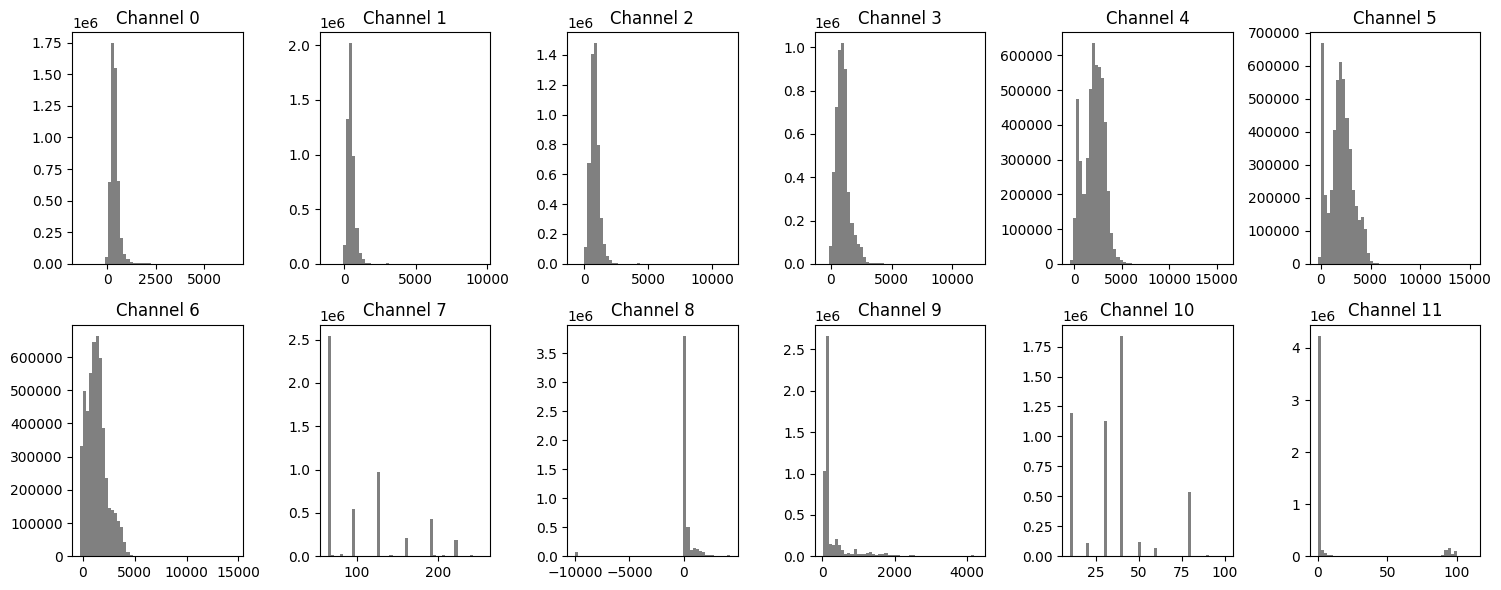

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
for c in range(C):
    plt.subplot(2, (C+1)//2, c+1)
    plt.hist(images[..., c].ravel(), bins=50, color="gray")
    plt.title(f"Channel {c}")
plt.tight_layout()
plt.show()

# Solve issues with images with -9999 values in some cells

In [9]:
has_nodata = [(img[..., 8] == -9999).any() for img in images]  # Get flags for images with -9999 values 
bad_indices = [i for i, flag in enumerate(has_nodata) if flag] # Get indecis of images with -9999 values 
print("Images with -9999 in channel 8:", bad_indices)

Images with -9999 in channel 8: [73, 125, 130, 142, 163, 196, 278]


In [12]:
DEM = images[...,8] # Get channel 9

for i in range(DEM.shape[0]): # Replace -9999 values with mean of other values in the same image
    valid = DEM[i][DEM[i] != -9999]
    if valid.size > 0:
        mean_val = np.mean(valid)
        DEM[i][DEM[i] == -9999] = mean_val
    else:
        DEM[i][:] = 0  # fallback if all nodata
        
images[..., 8] = DEM

images_preprocessed = np.delete(images, [7, 10], axis=-1) # Remove channels 8 and 11 due to irrelavence to label

print("Processed shape:",images_preprocessed.shape)

Processed shape: (306, 128, 128, 10)


# Perform per channel min-max normalization

In [13]:
mins = images_preprocessed.reshape(-1, images_preprocessed.shape[-1]).min(axis=0) # Get minimum values per channel
maxs = images_preprocessed.reshape(-1, images_preprocessed.shape[-1]).max(axis=0) # Get maximum values per channel

images_norm = (images_preprocessed - mins) / (maxs - mins + 1e-8) # Perform normalization

print("Normalized shape:",images_norm.shape)
    
np.save("mins.npy", mins) # Save minimums for future preprocessing
np.save("maxs.npy", maxs) # Save maximums for future preprocessing

Normalized shape: (306, 128, 128, 10)


# Create a U-Net model from scratch

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def conv_block(x, filters):
    x = layers.Conv2D(filters, 3, padding='same', activation='relu')(x)
    x = layers.Conv2D(filters, 3, padding='same', activation='relu')(x)
    return x


inputs = layers.Input((128,128,10))

c1 = conv_block(inputs, 64)
p1 = layers.MaxPool2D((2,2))(c1)

c2 = conv_block(p1, 128)
p2 = layers.MaxPool2D((2,2))(c2)

c3 = conv_block(p2, 256)
p3 = layers.MaxPool2D((2,2))(c3)

c4 = conv_block(p3, 512)
p4 = layers.MaxPool2D((2,2))(c4)

bn = conv_block(p4, 1024)

u1 = layers.UpSampling2D((2,2))(bn)
u1 = layers.Concatenate()([u1, c4])
c5 = conv_block(u1, 512)

u2 = layers.UpSampling2D((2,2))(c5)
u2 = layers.Concatenate()([u2, c3])
c6 = conv_block(u2, 256)

u3 = layers.UpSampling2D((2,2))(c6)
u3 = layers.Concatenate()([u3, c2])
c7 = conv_block(u3, 128)

u4 = layers.UpSampling2D((2,2))(c7)
u4 = layers.Concatenate()([u4, c1])
c8 = conv_block(u4, 64)

outputs = layers.Conv2D(1, 1, activation='sigmoid')(c8)

model_scratch = Model(inputs, outputs)
model_scratch.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 10)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 128, 128,  │      5,824 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 128, 128,  │     36,928 │ conv2d_19[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 64, 64,    │          0 │ conv2d_20[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 64, 64,    │     73,856 │ max_pooling2d_4[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 64, 64,    │    147,584 │ conv2d_21[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 32, 32,    │          0 │ conv2d_22[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 32, 32,    │    295,168 │ max_pooling2d_5[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 32, 32,    │    590,080 │ conv2d_23[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 16, 16,    │          0 │ conv2d_24[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 16, 16,    │  1,180,160 │ max_pooling2d_6[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 16, 16,    │  2,359,808 │ conv2d_25[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 8, 8, 512) │          0 │ conv2d_26[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 8, 8,      │  4,719,616 │ max_pooling2d_7[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 8, 8,      │  9,438,208 │ conv2d_27[0][0]   │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_4     │ (None, 16, 16,    │          0 │ conv2d_28[0][0]   │
│ (UpSampling2D)      │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 16, 16,    │          0 │ up_sampling2d_4[

 Total params: 31,382,977 (119.72 MB)

 Trainable params: 31,382,977 (119.72 MB)

 Non-trainable params: 0 (0.00 B)

# Define Loss Function and evaluation metrecis

In [16]:
def weighted_bce_dice_loss(y_true, y_pred, weight_pos=5.0):
    # Ensure float32
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    # Weighted BCE
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)  # shape: (B,H,W) or (B,H,W,1)
    bce = tf.expand_dims(bce, axis=-1) if len(bce.shape) == 3 else bce  # match (B,H,W,1)

    weight = 1 + (weight_pos - 1) * y_true   # same shape as y_true
    weighted_bce = weight * bce

    # Dice loss
    smooth = 1e-6
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    dice_loss = 1 - (2. * intersection + smooth) / (
        tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth
    )

    return tf.reduce_mean(weighted_bce) + dice_loss



def iou_metric(y_true, y_pred, smooth=1e-6):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred > 0.5, tf.float32)

    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection
    return (intersection + smooth) / (union + smooth)


def precision_metric(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred > 0.5, tf.float32)

    tp = tf.reduce_sum(y_true * y_pred)
    fp = tf.reduce_sum((1 - y_true) * y_pred)
    return tp / (tp + fp + 1e-6)


def recall_metric(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred > 0.5, tf.float32)

    tp = tf.reduce_sum(y_true * y_pred)
    fn = tf.reduce_sum(y_true * (1 - y_pred))
    return tp / (tp + fn + 1e-6)


def f1_metric(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred > 0.5, tf.float32)

    p = precision_metric(y_true, y_pred)
    r = recall_metric(y_true, y_pred)
    return 2 * p * r / (p + r + 1e-6)

model_scratch.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss=weighted_bce_dice_loss,
    metrics=[ iou_metric, precision_metric, recall_metric, f1_metric]
)

# Reshape label to have 4 dimensions

In [17]:
print("Images shape: ",images_norm.shape)
labels = labels[...,None]
print("Labels shape: ",labels.shape)
print("Unique values in labels:", np.unique(labels))

Images shape:  (306, 128, 128, 10)
Labels shape:  (306, 128, 128, 1)
Unique values in labels: [0 1]


In [18]:
history = model_scratch.fit(
    images_norm, labels,   
    batch_size=8,
    epochs=100
)

Epoch 1/100


I0000 00:00:1760654029.354260     125 service.cc:148] XLA service 0x7c946c008b20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1760654029.354987     125 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1760654030.247594     125 cuda_dnn.cc:529] Loaded cuDNN version 90300


 2/39 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - f1_metric: 0.2536 - iou_metric: 0.2058 - loss: 2.0821 - precision_metric: 0.2836 - recall_metric: 0.2294  

I0000 00:00:1760654041.016883     125 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


38/39 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - f1_metric: 0.4729 - iou_metric: 0.3406 - loss: 1.9436 - precision_metric: 0.3721 - recall_metric: 0.8458

E0000 00:00:1760654046.389487     125 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1760654046.634279     125 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


39/39 ━━━━━━━━━━━━━━━━━━━━ 31s 269ms/step - f1_metric: 0.4766 - iou_metric: 0.3438 - loss: 1.9315 - precision_metric: 0.3758 - recall_metric: 0.8481
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - f1_metric: 0.7392 - iou_metric: 0.5965 - loss: 1.2112 - precision_metric: 0.6738 - recall_metric: 0.8381
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - f1_metric: 0.7575 - iou_metric: 0.6159 - loss: 1.1301 - precision_metric: 0.7190 - recall_metric: 0.8310
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - f1_metric: 0.7559 - iou_metric: 0.6143 - loss: 0.9652 - precision_metric: 0.6945 - recall_metric: 0.8544
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - f1_metric: 0.7065 - iou_metric: 0.5580 - loss: 1.0369 - precision_metric: 0.6182 - recall_metric: 0.8568
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - f1_metric: 0.7166 - iou_metric: 0.5679 - loss: 0.9723 - precision_metric: 0.6423 - recall_metric: 0.8399
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - f1

# Evaluate Trained Model using F1 and IoU

In [19]:
# Predict the labels of the images
y_pred = model_scratch.predict(images_norm)

# Get the labels in binary
y_pred_bin = (y_pred > 0.5).astype("uint8")

# Flatten labels in 1-D array
y_true_flat = labels.flatten()
y_pred_flat = y_pred_bin.flatten()

print("True labels shape: ",y_true_flat.shape)
print("Predict labels shape: ",y_pred_flat.shape)

 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step

E0000 00:00:1760654381.498319     128 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1760654381.749244     128 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 785ms/step
True labels shape:  (5013504,)
Predict labels shape:  (5013504,)


In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score, jaccard_score

iou = jaccard_score(y_true_flat, y_pred_flat)
precision = precision_score(y_true_flat, y_pred_flat)
recall = recall_score(y_true_flat, y_pred_flat)
f1 = f1_score(y_true_flat, y_pred_flat)

print(f"IoU: {iou*100:.4f}%")
print(f"Precision: {precision*100:.4f}%")
print(f"Recall: {recall*100:.4f}%")
print(f"F1-score: {f1*100:.4f}%")

IoU: 96.9610%
Precision: 97.4958%
Recall: 99.4374%
F1-score: 98.4570%


# Plot predicted labels vs true labels

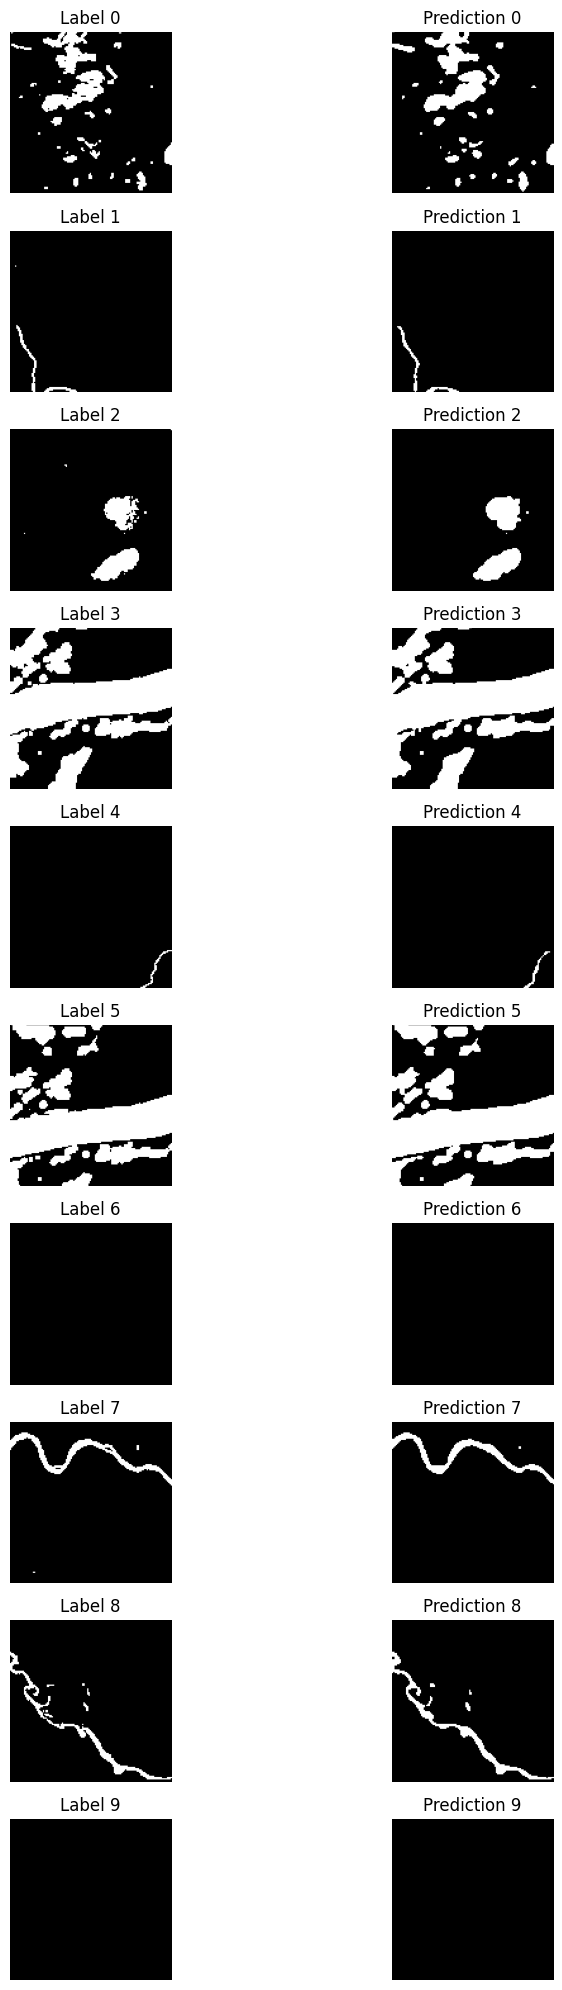

In [21]:
import matplotlib.pyplot as plt

num_samples = 10  # how many samples to show

plt.figure(figsize=(10, 2 * num_samples))

for i in range(num_samples):
    # Label
    plt.subplot(num_samples, 2, 2 * i + 1)
    plt.imshow(labels[i].squeeze(), cmap="gray")
    plt.axis("off")
    plt.title(f"Label {i}")

    # Prediction
    plt.subplot(num_samples, 2, 2 * i + 2)
    plt.imshow(y_pred_bin[i].squeeze(), cmap="gray")
    plt.axis("off")
    plt.title(f"Prediction {i}")

plt.tight_layout()
plt.show()


# Use a pretrained encoder

In [22]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, Model

base_model = EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(128, 128, 3)
)

# Freeze encoder layers
for layer in base_model.layers:
    layer.trainable = False

# Get encoder outputs for skip connections
skip_names = ["block2a_expand_activation",
              "block3a_expand_activation",
              "block4a_expand_activation",
              "block6a_expand_activation"]

# Create input layer for 10 channels input
inputs = layers.Input(shape=(128, 128, 10))

# Create a first Conv Layer that decreases number of channels to 3
first_conv = layers.Conv2D(3, 1, padding="same")(inputs)

# Create encoder model
encoder = Model(base_model.input, [base_model.get_layer(name).output for name in skip_names] + [base_model.output])

# Get skip connections and output from encoder
skips_and_features = encoder(first_conv)
*skips, features = skips_and_features

# Add decoder using skip connections and encoder output
x = features
for skip in reversed(skips):
    x = layers.Conv2DTranspose(256, 3, strides=2, padding="same")(x)
    x = layers.Concatenate()([x, skip])
    x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)

# Create a output layer with sigmoid
outputs = layers.Conv2DTranspose(1, 3, strides=2, padding="same", activation="sigmoid")(x)

# Create the pretrained model object
model_pretrained = Model(inputs, outputs)
model_pretrained.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 10)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_38 (Conv2D)  │ (None, 128, 128,  │         33 │ input_layer_3[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_2        │ [(None, 64, 64,   │  4,049,571 │ conv2d_38[0][0]   │
│ (Functional)        │ 96), (None, 32,   │            │                   │
│                     │ 32, 144), (None,  │            │                   │
│                     │ 16, 16, 240),     │            │                   │
│                     │ (None, 8, 8,      │            │                   │
│                     │ 672), (None, 4,   │            │                   │
│                     │ 4, 1280)]         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 8, 8, 256) │  2,949,376 │ functional_2[0][… │
│ (Conv2DTranspose)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 8, 8, 928) │          0 │ conv2d_transpose… │
│ (Concatenate)       │                   │            │ functional_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_39 (Conv2D)  │ (None, 8, 8, 256) │  2,138,368 │ concatenate_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_1  │ (None, 16, 16,    │    590,080 │ conv2d_39[0][0]   │
│ (Conv2DTranspose)   │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_9       │ (None, 16, 16,    │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 496)              │            │ functional_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 16, 16,    │  1,143,040 │ concatenate_9[0]… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_2  │ (None, 32, 32,    │    590,080 │ conv2d_40[0][0]   │
│ (Conv2DTranspose)   │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_10      │ (None, 32, 32,    │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 400)              │            │ functional_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_41 (Conv2D)  │ (None, 32, 32,    │    921,856 │ concatenate_10[0… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_3  │ (None, 64, 64,    │    590,080 │ conv2d_41[0][0]   │
│ (Conv2DTranspose)   │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_11      │ (None, 64, 64,    │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 352)              │            │ functional_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_42 (Conv2D)  │ (None, 64, 64,    │    811,264 │ concatenate_11[0… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 13,786,053 (52.59 MB)

 Trainable params: 9,736,482 (37.14 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [24]:
model_pretrained.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss=weighted_bce_dice_loss,
    metrics=[ iou_metric, precision_metric, recall_metric, f1_metric]
)

In [25]:
model_pretrained.fit(
    images_norm, labels,   
    batch_size=8,
    epochs=100
)

Epoch 1/100


2025-10-16 22:46:43.863026: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng12{k11=2} for conv (f32[8,256,64,64]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,352,64,64]{3,2,1,0}, f32[256,352,3,3]{3,2,1,0}, f32[256]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2025-10-16 22:46:43.869325: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.006427202s
Trying algorithm eng12{k11=2} for conv (f32[8,256,64,64]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,352,64,64]{3,2,1,0}, f32[256,352,3,3]{3,2,1,0}, f32[256]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", b

37/39 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - f1_metric: 0.4019 - iou_metric: 0.2586 - loss: 2.0149 - precision_metric: 0.2651 - recall_metric: 0.9636

E0000 00:00:1760654822.008028     125 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1760654822.280820     125 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


39/39 ━━━━━━━━━━━━━━━━━━━━ 51s 402ms/step - f1_metric: 0.4018 - iou_metric: 0.2587 - loss: 2.0135 - precision_metric: 0.2649 - recall_metric: 0.9652
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - f1_metric: 0.3707 - iou_metric: 0.2320 - loss: 1.9642 - precision_metric: 0.2320 - recall_metric: 1.0000
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - f1_metric: 0.4055 - iou_metric: 0.2609 - loss: 1.9853 - precision_metric: 0.2609 - recall_metric: 1.0000
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - f1_metric: 0.3952 - iou_metric: 0.2516 - loss: 1.9853 - precision_metric: 0.2517 - recall_metric: 0.9982
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - f1_metric: 0.3711 - iou_metric: 0.2371 - loss: 1.9880 - precision_metric: 0.2373 - recall_metric: 0.9977
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - f1_metric: 0.4254 - iou_metric: 0.2756 - loss: 1.9792 - precision_metric: 0.2758 - recall_metric: 0.9961
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - f1

In [26]:
# Predict the labels of the images
y_pred = model_pretrained.predict(images_norm)

# Get the labels in binary
y_pred_bin = (y_pred > 0.5).astype("uint8")

# Flatten labels in 1-D array
y_true_flat = labels.flatten()
y_pred_flat = y_pred_bin.flatten()

print("True labels shape: ",y_true_flat.shape)
print("Predict labels shape: ",y_pred_flat.shape)

 8/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

E0000 00:00:1760655023.002969     126 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1760655023.283960     126 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step
True labels shape:  (5013504,)
Predict labels shape:  (5013504,)


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, jaccard_score

iou = jaccard_score(y_true_flat, y_pred_flat)
precision = precision_score(y_true_flat, y_pred_flat)
recall = recall_score(y_true_flat, y_pred_flat)
f1 = f1_score(y_true_flat, y_pred_flat)

print(f"IoU: {iou*100:.4f}%")
print(f"Precision: {precision*100:.4f}%")
print(f"Recall: {recall*100:.4f}%")
print(f"F1-score: {f1*100:.4f}%")

IoU: 54.5915%
Precision: 61.8644%
Recall: 82.2810%
F1-score: 70.6268%


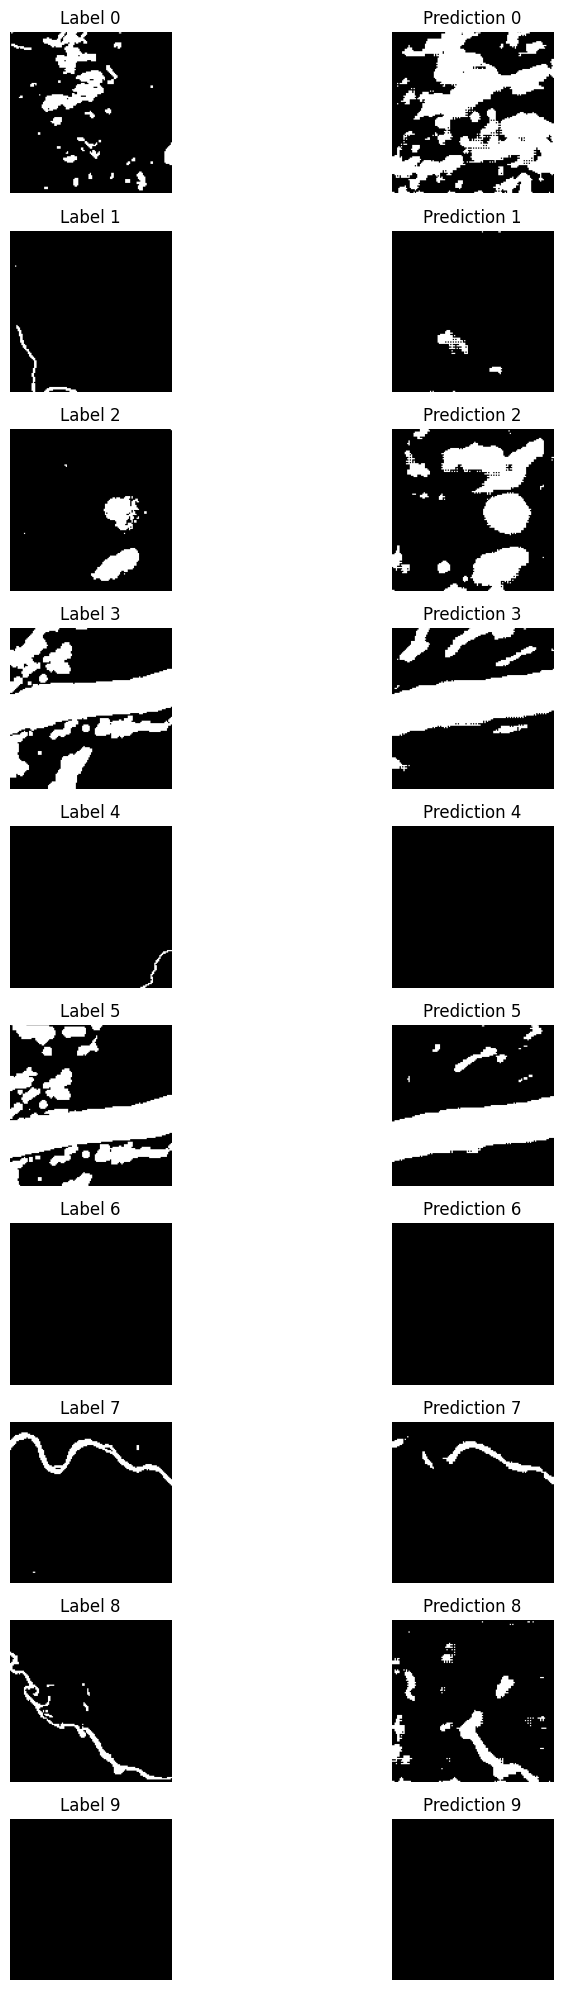

In [28]:
import matplotlib.pyplot as plt

num_samples = 10  # how many samples to show

plt.figure(figsize=(10, 2 * num_samples))

for i in range(num_samples):
    # Label
    plt.subplot(num_samples, 2, 2 * i + 1)
    plt.imshow(labels[i].squeeze(), cmap="gray")
    plt.axis("off")
    plt.title(f"Label {i}")

    # Prediction
    plt.subplot(num_samples, 2, 2 * i + 2)
    plt.imshow(y_pred_bin[i].squeeze(), cmap="gray")
    plt.axis("off")
    plt.title(f"Prediction {i}")

plt.tight_layout()
plt.show()

# Save the model, minimum values & maximum values of the model chosen

In [29]:
from IPython.display import FileLink

model_scratch.save("my_model.h5")

# This will create 2 files:
# my_model_ckpt.index
# my_model_ckpt.data-00000-of-00001

FileLink("my_model.h5")

/kaggle/working/my_model.h5

In [30]:
FileLink("mins.npy")


/kaggle/working/mins.npy

In [31]:
FileLink("maxs.npy")

/kaggle/working/maxs.npy